In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import scvi
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
pmap2=[ "#010067","#9E008E","#FFE502","#005F39","#00FF00","#FF937E",
          "#A42400","#001544","#91D0CB","#620E00","#0000FF","#007DB5","#6A826C","#00AE7E","#C28C9F",
          "orange","#008F9C","#5FAD4E","#FF0000","#FF00F6","#FF029D","#683D3B","#FF74A3","#968AE8","#98FF52",
          "#A75740","#01FFFE","#FFEEE8","#FE8900","#BDC6FF","#01D0FF","#BB8800","#7544B1","#A5FFD2","#FFA6FE",
          "#774D00","#7A4782","#263400","#004754","#43002C","#B500FF","#FFB167","#FFDB66","#90FB92","#7E2DD2",
          "#BDD393","#E56FFE","#DEFF74","#00FF78","#009BFF","#006401","#0076FF","#85A900","#00B917","#788231",
          "#00FFC6","#FF6E41","#E85EBE"]

In [8]:
r204_pre = sc.read_h5ad('ribas_final/ribas_204_pre_GEX_final_thresh_cb.h5')

In [9]:
r294_on = sc.read_h5ad('ribas_final/ribas_294_on_GEX_final_thresh_cb.h5')

In [10]:
r308_pre = sc.read_h5ad('ribas_final/ribas_308_pre_GEX_final_thresh_cb.h5')

In [2]:
r310_on = sc.read_h5ad('ribas_final/ribas_310_on_GEX_5pv2_S27_L004_final_thresh_cb.h5')

In [5]:
r310_on.shape

(11117, 30408)

In [3]:
r310_on_later = sc.read_h5ad('ribas_final/ribas_310_on_later_previd_3_GEX_final_thresh_cb.h5')

In [6]:
r310_on_later.shape

(13430, 28540)

In [4]:
r310_pre = sc.read_h5ad('ribas_final/ribas_310_pre_GEX_5pv2_S26_L004_final_thresh.h5')

In [8]:
r310_pre.shape

(11145, 29317)

In [14]:
r319_on = sc.read_h5ad('ribas_final/ribas_319_on_previd_2_GEX_final_thresh_cb.h5')

In [15]:
r319_pre = sc.read_h5ad('ribas_final/ribas_319_pre_previd_1_GEX_final_thresh_cb.h5')

In [16]:
r328_on = sc.read_h5ad('ribas_final/ribas_328_on_GEX_final_thresh_cb.h5')

In [17]:
r329_on = sc.read_h5ad('ribas_final/ribas_329_on_GEX_final_thresh_cb.h5')

In [18]:
r334_pre = sc.read_h5ad('ribas_final/ribas_334_pre_GEX_final_thresh_cb.h5')

In [19]:
r354_pre = sc.read_h5ad('ribas_final/ribas_354_pre_GEX_final_thresh_cb.h5')

In [20]:
ribas_merged = r204_pre.concatenate(r294_on,r308_pre,r310_on,r310_on_later,r310_pre,r319_on,r319_pre,r328_on,
                                    r329_on,r334_pre,r354_pre)

In [9]:
ribas_merged=filtered_rdf[0].concatenate(filtered_rdf[1],filtered_rdf[2])

In [18]:
subsample(ribas_merged,"manual_annotations","Melanoma cells").write_h5ad("BALALA")

/home/lf2684/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'orig.ident' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'patient' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype_bped_main' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype_bped_fine' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype_iced_fine' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype_hpca_main' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype_hpca_fine' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype_mid_main' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype_mid_fine' as cat

In [10]:
barcodes=list(ribas_merged.obs_names)
annots=list(annot['barcode'])
for i in range(len(barcodes)):
    if barcodes[i].split("-")[0]!=annots[i].split("-")[0]:
        print(barcodes[i],annots[i])

In [11]:
ribas_merged.obs["manual_annotations"]=list(annot['manual_annotation_label'])

In [6]:
#save a copy of counts for scvi (from tutorial)
ribas_merged.layers["counts"] = ribas_merged.X.copy()

In [37]:
#normalize + log transform using scanpy

#NORMALIZATION AND LOG TRANSFORM
sc.pp.calculate_qc_metrics(ribas_merged, inplace=True)

# UPDATE OBS WITH USE

# store the current 'total_counts' under original_total_counts, which will not automatically be updated
# by scanpy in subsequent filtering steps
ribas_merged.obs['original_total_counts'] = ribas_merged.obs['total_counts']

# log10 original library size
ribas_merged.obs['log10_original_total_counts'] = np.log10(ribas_merged.obs['original_total_counts'])

# Normalize by median library size
med = np.median(ribas_merged.obs['original_total_counts'])
sc.pp.normalize_per_cell(ribas_merged, counts_per_cell_after = med)

#log transform + 1 and updates adata.X
sc.pp.log1p(ribas_merged)

In [57]:
#sc.pp.filter_genes(ribas_merged,min_cells=ribas_merged.shape[0]*.05)

In [58]:
#sc.tl.pca(ribas_merged,n_comps=100)

In [38]:
sc.pp.neighbors(ribas_merged)
sc.tl.umap(ribas_merged)

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'orig.ident' as categorical
... storing 'patient' as categorical
... storing 'celltype_bped_main' as categorical
... storing 'celltype_bped_fine' as categorical
... storing 'celltype_iced_fine' as categorical
... storing 'celltype_hpca_main' as categorical
... storing 'celltype_hpca_fine' as categorical
... storing 'celltype_mid_main' as categorical
... storing 'celltype_mid_fine' as categorical
... storing 'manual_annotations' as categorical


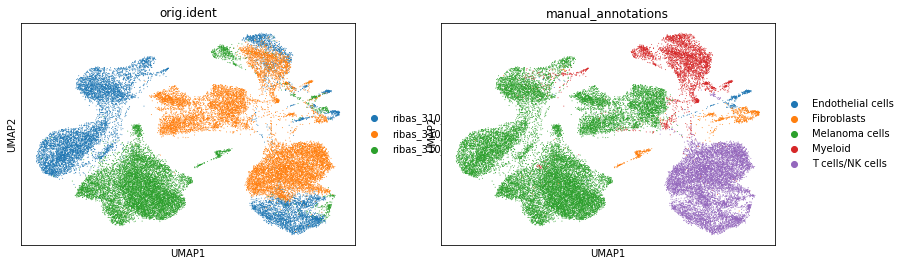

In [39]:
sc.pl.umap(ribas_merged,color=["orig.ident",'manual_annotations'])

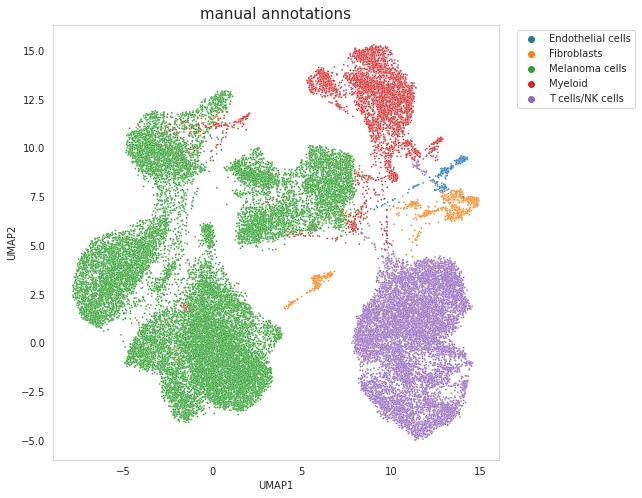

In [54]:
randomize=np.arange(len(ribas_merged.obs["orig.ident"]))
np.random.shuffle(randomize)
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.set_style("whitegrid", {'axes.grid' : False})
scatter=sns.scatterplot(x=ribas_merged.obsm["X_umap"][:,0][randomize],y=ribas_merged.obsm["X_umap"][:,1][randomize], hue=ribas_merged.obs["manual_annotations"][randomize],s=3)
scatter.legend(bbox_to_anchor= (1.03, 1) );
scatter.set_xlabel("UMAP1", fontsize = 10)
scatter.set_ylabel("UMAP2", fontsize = 10)
scatter.set_title("manual annotations", fontsize = 15)
plt.savefig("figures/2a_2.pdf",format='pdf',bbox_inches='tight')

In [45]:
treatment=[]
for i in ribas_merged.obs["orig.ident"]:
    if i=="ribas_310_on_GEX_5pv2_S27_L004":
        treatment.append("on")
    elif i=="ribas_310_on_later_previd_3_GEX":
        treatment.append("on_later")
    elif i=="ribas_310_pre_GEX_5pv2_S26_L004":
        treatment.append("pre")

In [46]:
ribas_merged.obs["treatment"]=treatment

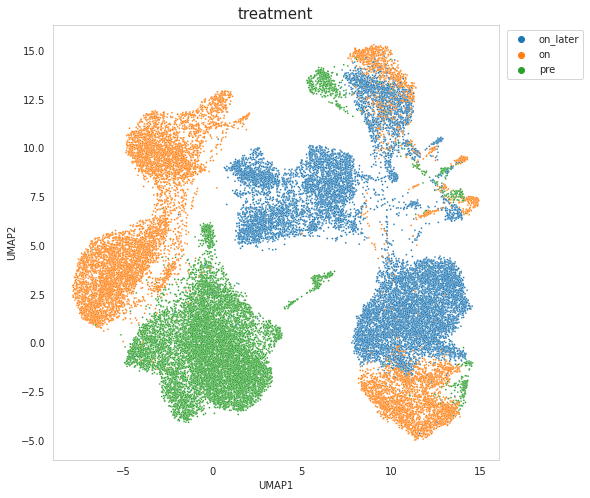

In [55]:
randomize=np.arange(len(ribas_merged.obs["orig.ident"]))
np.random.shuffle(randomize)
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.set_style("whitegrid", {'axes.grid' : False})
scatter=sns.scatterplot(x=ribas_merged.obsm["X_umap"][:,0][randomize],y=ribas_merged.obsm["X_umap"][:,1][randomize], hue=ribas_merged.obs["treatment"][randomize],s=3)
scatter.legend(bbox_to_anchor= (1.2, 1) );
scatter.set_xlabel("UMAP1", fontsize = 10)
scatter.set_ylabel("UMAP2", fontsize = 10)
scatter.set_title("treatment", fontsize = 15)
plt.savefig("figures/2a_1.pdf",format='pdf',bbox_inches='tight')

In [5]:
annot=pd.read_csv("natgen_annots/ribas_310_manual_annotation_label.csv")

In [6]:
df_list=[]
barcode=list(annot['barcode'])
orig=list(annot['orig.ident'])
man=list(annot['manual_annotation_label'])

for i in np.unique(annot['orig.ident']):
    df=pd.DataFrame()
    for j in range(annot.shape[0]):
        if orig[j]==i:
            df[barcode[j]]=[orig[j],man[j]]
    df_list.append(df.T)

In [7]:
rdf=[r310_on,r310_on_later,r310_pre]

In [8]:
filtered_rdf=[]
for j in range(len(rdf)):
    keep=[]
    for i in range(len(rdf[j].obs_names)):
        if rdf[j].obs_names[i] in df_list[j].index:
            keep.append(i)
    filtered_rdf.append(rdf[j][keep,:])

In [25]:
treatment=[]
for i in ribas_merged.obs["orig.ident"]:
    if "_pre_" in i:
        treatment.append("pre")
    elif "on" in i:
        if "later" not in i:
            treatment.append("on")
        else:
            treatment.append("on_later")
    

In [26]:
ribas_merged.obs["treatment"]=treatment

... storing 'treatment' as categorical


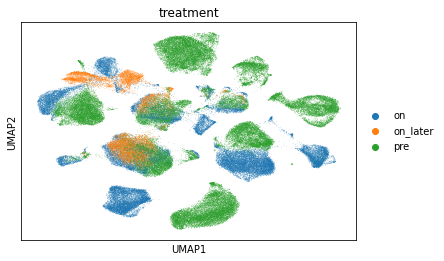

In [27]:
sc.pl.umap(ribas_merged,color=["treatment"],ncols=1)

In [28]:
pre = subsample(ribas_merged, "orig.ident", ['ribas_204_pre_GEX',
                                             'ribas_308_pre_GEX',
                                             'ribas_310_pre_GEX_5pv2_S26_L004',
                                             'ribas_319_pre_previd_1_GEX',
                                             'ribas_334_pre_GEX', 'ribas_354_pre_GEX'
                                            ])

In [29]:
on = subsample(ribas_merged, "orig.ident", ['ribas_294_on_GEX',
                                            'ribas_310_on_GEX_5pv2_S27_L004',
                                            'ribas_319_on_previd_2_GEX',
                                            'ribas_328_on_GEX',
                                            'ribas_329_on_GEX'
                                            ])

In [30]:
on_later = subsample(ribas_merged, 'orig.ident',['ribas_310_on_later_previd_3_GEX'])

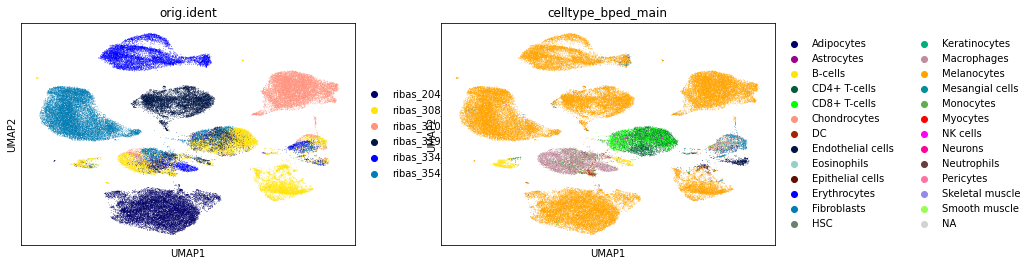

In [31]:
sc.pp.neighbors(pre)
sc.tl.umap(pre)
sc.pl.umap(pre, color=['orig.ident','celltype_bped_main'])

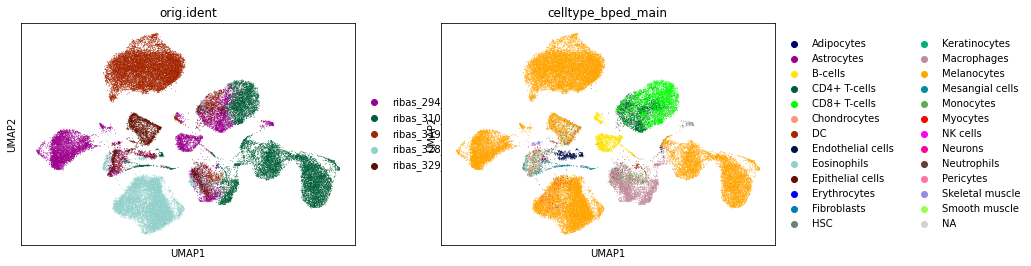

In [32]:
sc.pp.neighbors(on)
sc.tl.umap(on)
sc.pl.umap(on, color=['orig.ident','celltype_bped_main'])

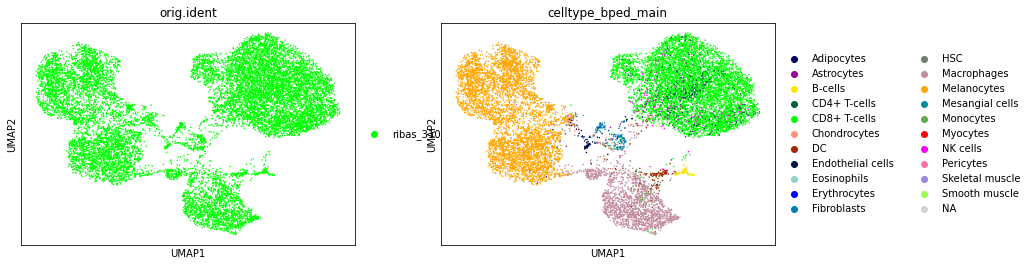

In [33]:
sc.pp.neighbors(on_later)
sc.tl.umap(on_later)
sc.pl.umap(on_later, color=['orig.ident','celltype_bped_main'])

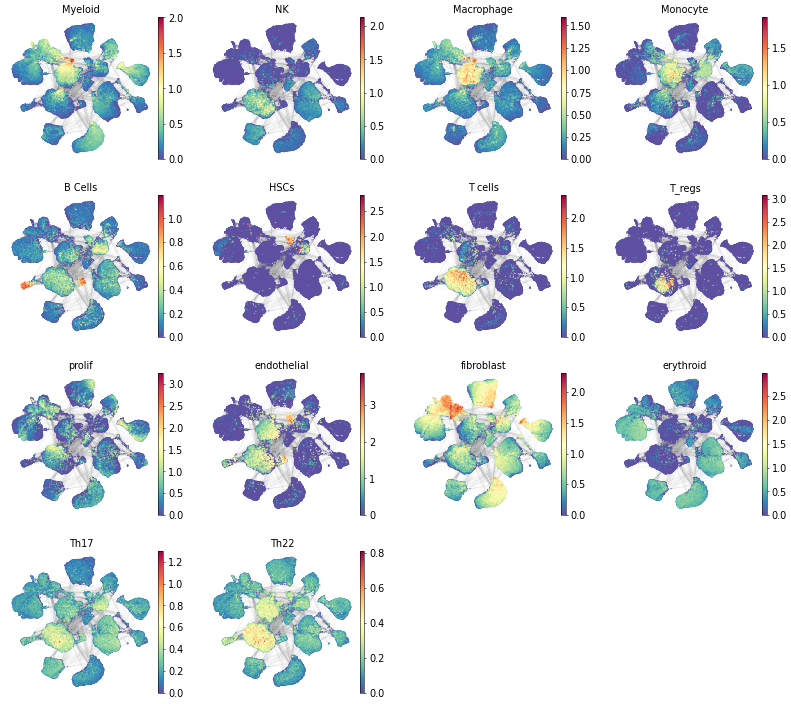

In [34]:
plot_sigs(ribas_merged)

In [35]:
scvi.data.setup_anndata(ribas_merged, layer="counts", batch_key="orig.ident")

INFO     Using batches from adata.obs["orig.ident"]                                          
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 132443 cells, 21558 vars, 12      
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [36]:
vae = scvi.model.SCVI(ribas_merged, n_layers=2, n_latent=30)
vae.train()

INFO     Training for 60 epochs                                                              
INFO     KL warmup phase exceeds overall training phaseIf your applications rely on the      
         posterior quality, consider training for more epochs or reducing the kl warmup.     
INFO     KL warmup for 400 epochs                                                            
Training...: 100%|██████████| 60/60 [6:54:36<00:00, 414.60s/it]  
INFO     Training is still in warming up phase. If your applications rely on the posterior   
         quality, consider training for more epochs or reducing the kl warmup.               
INFO     Training time:  24876 s. / 60 epochs                                                


In [37]:
ribas_merged.obsm["X_scVI"] = vae.get_latent_representation()

vae.save("ribas_final/COHORT_merged_scvi_model.weights")

ribas_merged.write_h5ad("./ribas_final/COHORT_merged_SCVI_MERGED.h5")

In [3]:
ribas_merged = sc.read_h5ad("./ribas_final/COHORT_merged_SCVI_MERGED.h5")

In [3]:
sc.pp.neighbors(ribas_merged, use_rep="X_scVI")
sc.tl.umap(ribas_merged)

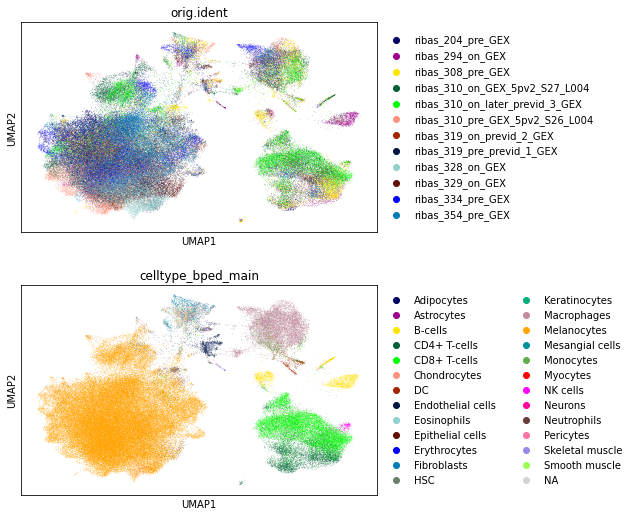

In [4]:
sc.pl.umap(ribas_merged,color=['orig.ident','celltype_bped_main'],ncols=1)

In [6]:
vae = scvi.model.SCVI.load("ribas_final/COHORT_merged_scvi_model.weights",ribas_merged)

INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 132443 cells, 21558 vars, 12      
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


In [7]:
ribas_merged.shape


(132443, 21558)

In [8]:
batch_norm=np.zeros(ribas_merged.shape)
for i in np.unique(ribas_merged.obs["orig.ident"]):
    print(i)
    batch_norm+=vae.get_normalized_expression(transform_batch=i)

ribas_204_pre_GEX
ribas_294_on_GEX
ribas_308_pre_GEX
ribas_310_on_GEX_5pv2_S27_L004
ribas_310_on_later_previd_3_GEX
ribas_310_pre_GEX_5pv2_S26_L004
ribas_319_on_previd_2_GEX
ribas_319_pre_previd_1_GEX
ribas_328_on_GEX
ribas_329_on_GEX
ribas_334_pre_GEX
ribas_354_pre_GEX


In [10]:
batch_norm=batch_norm/len(np.unique(ribas_merged.obs["orig.ident"]))

         Falling back to preprocessing with `sc.pp.pca` and default params.


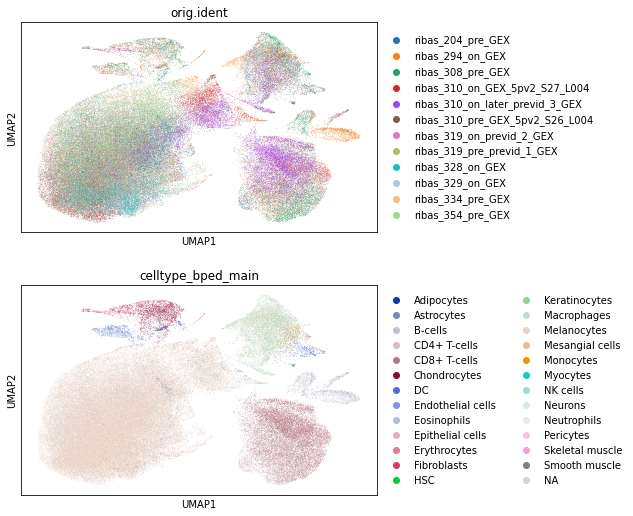

In [11]:
ribas_merged.layers["scvi_normalized"]=batch_norm
normed = sc.AnnData(ribas_merged.layers["scvi_normalized"],obs=ribas_merged.obs)
sc.pp.neighbors(normed)
sc.tl.umap(normed)

sc.pl.umap(normed,color=["orig.ident", "celltype_bped_main"],ncols=1)

In [12]:
ribas_merged.write_h5ad("./ribas_final/COHORT_merged_SCVI_MERGED.h5")

### CNA Analysis

In [9]:
r310 = subsample(ribas_merged, "orig.ident", ['ribas_310_on_GEX_5pv2_S27_L004','ribas_310_on_later_previd_3_GEX','ribas_310_pre_GEX_5pv2_S26_L004'])

In [11]:
r310.write_h5ad("ribas310_10.17.21.h5")

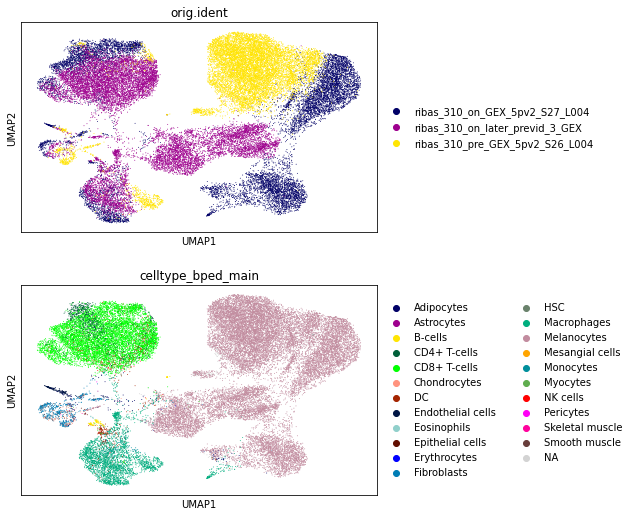

In [10]:
sc.pp.neighbors(r310)
sc.tl.umap(r310)
sc.pl.umap(r310, color=["orig.ident", 'celltype_bped_main'], ncols=1, palette=pmap2)

In [10]:
r310 = subsample(r310, "celltype_bped_main", ['Melanocytes'])

In [11]:
sc.pp.neighbors(r310)
sc.tl.umap(r310)

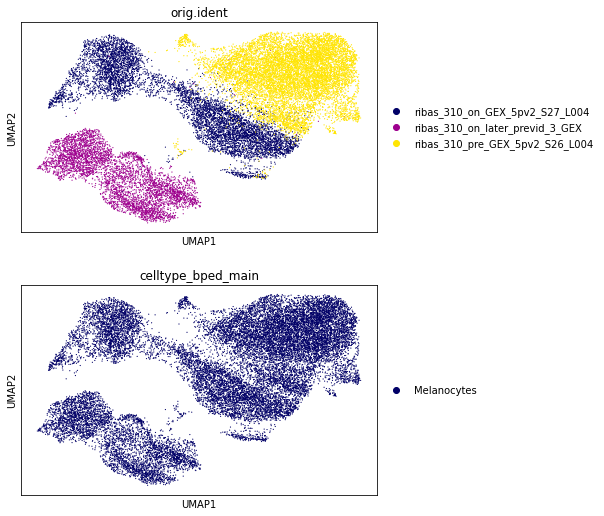

In [12]:
sc.pl.umap(r310, color=["orig.ident", 'celltype_bped_main'], ncols=1, palette=pmap2)

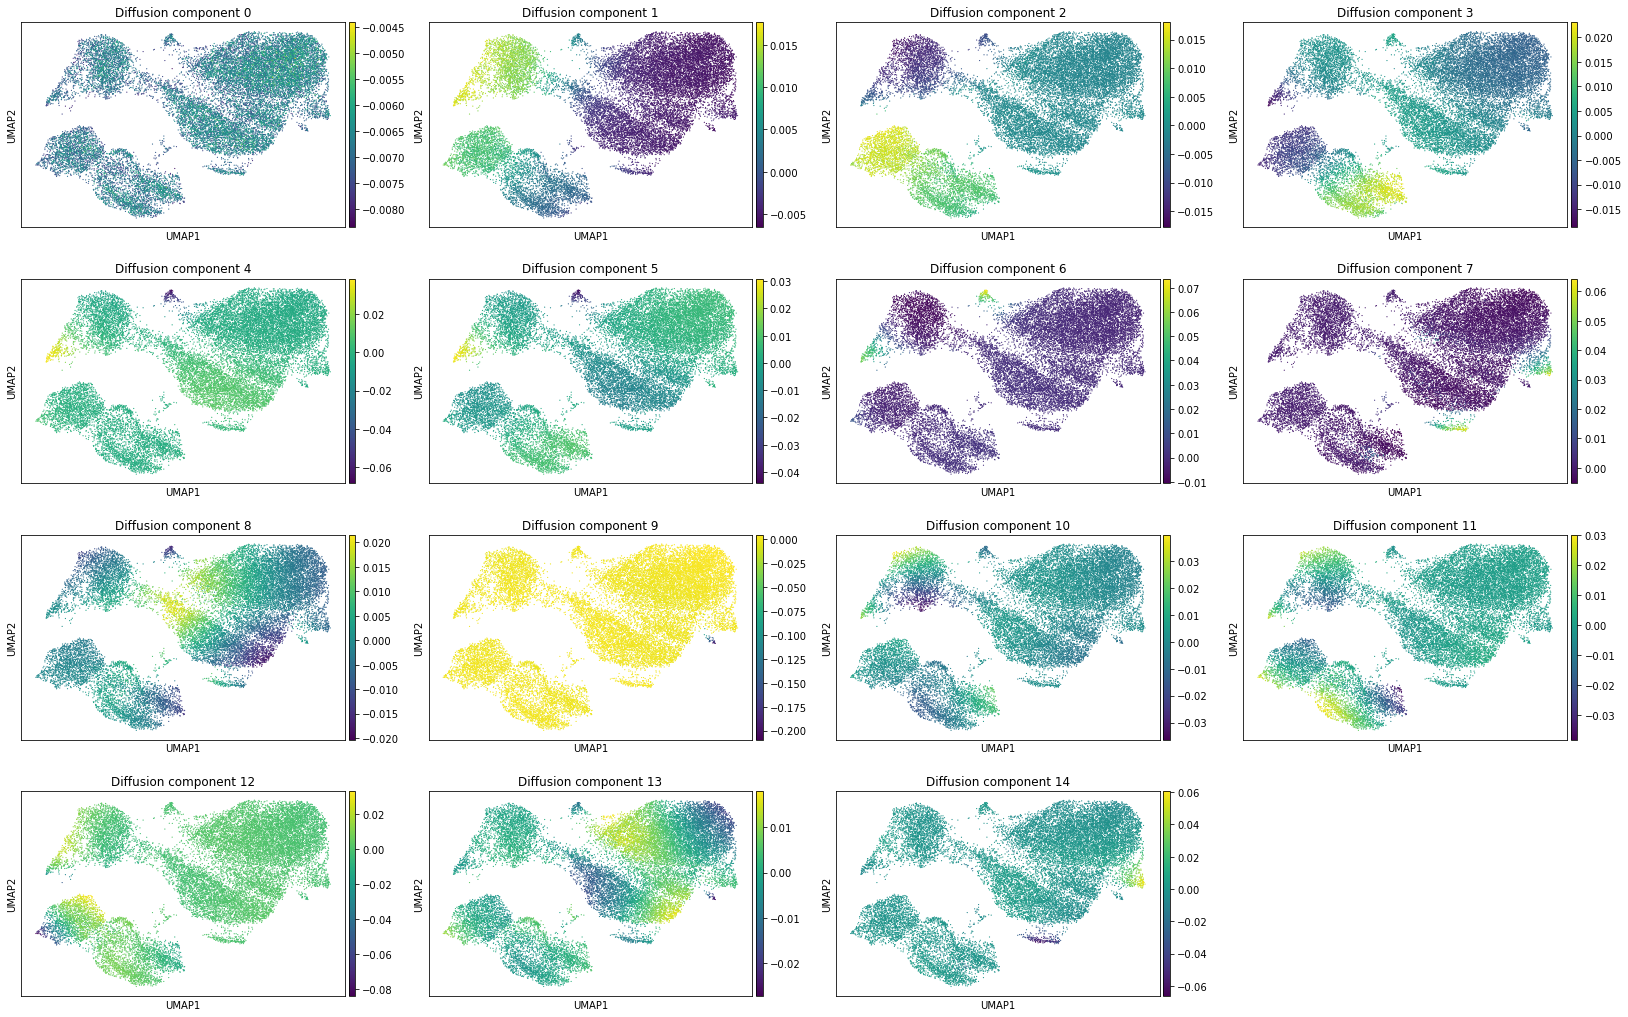

In [13]:
sc.tl.diffmap(r310)
for i in range(r310.obsm["X_diffmap"].shape[1]):
    r310.obs["Diffusion component "+str(i)]=r310.obsm["X_diffmap"][:,i]

r310.obs["Diffusion component 1"]=-1*r310.obs["Diffusion component 1"]
sc.pl.umap(r310, color=["Diffusion component "+str(i) for i in range(r310.obsm["X_diffmap"].shape[1])])

[ 2  1  3  4  5  7  6 12 11  8 13 14  9 10  0]
[2 1 3 4 5]


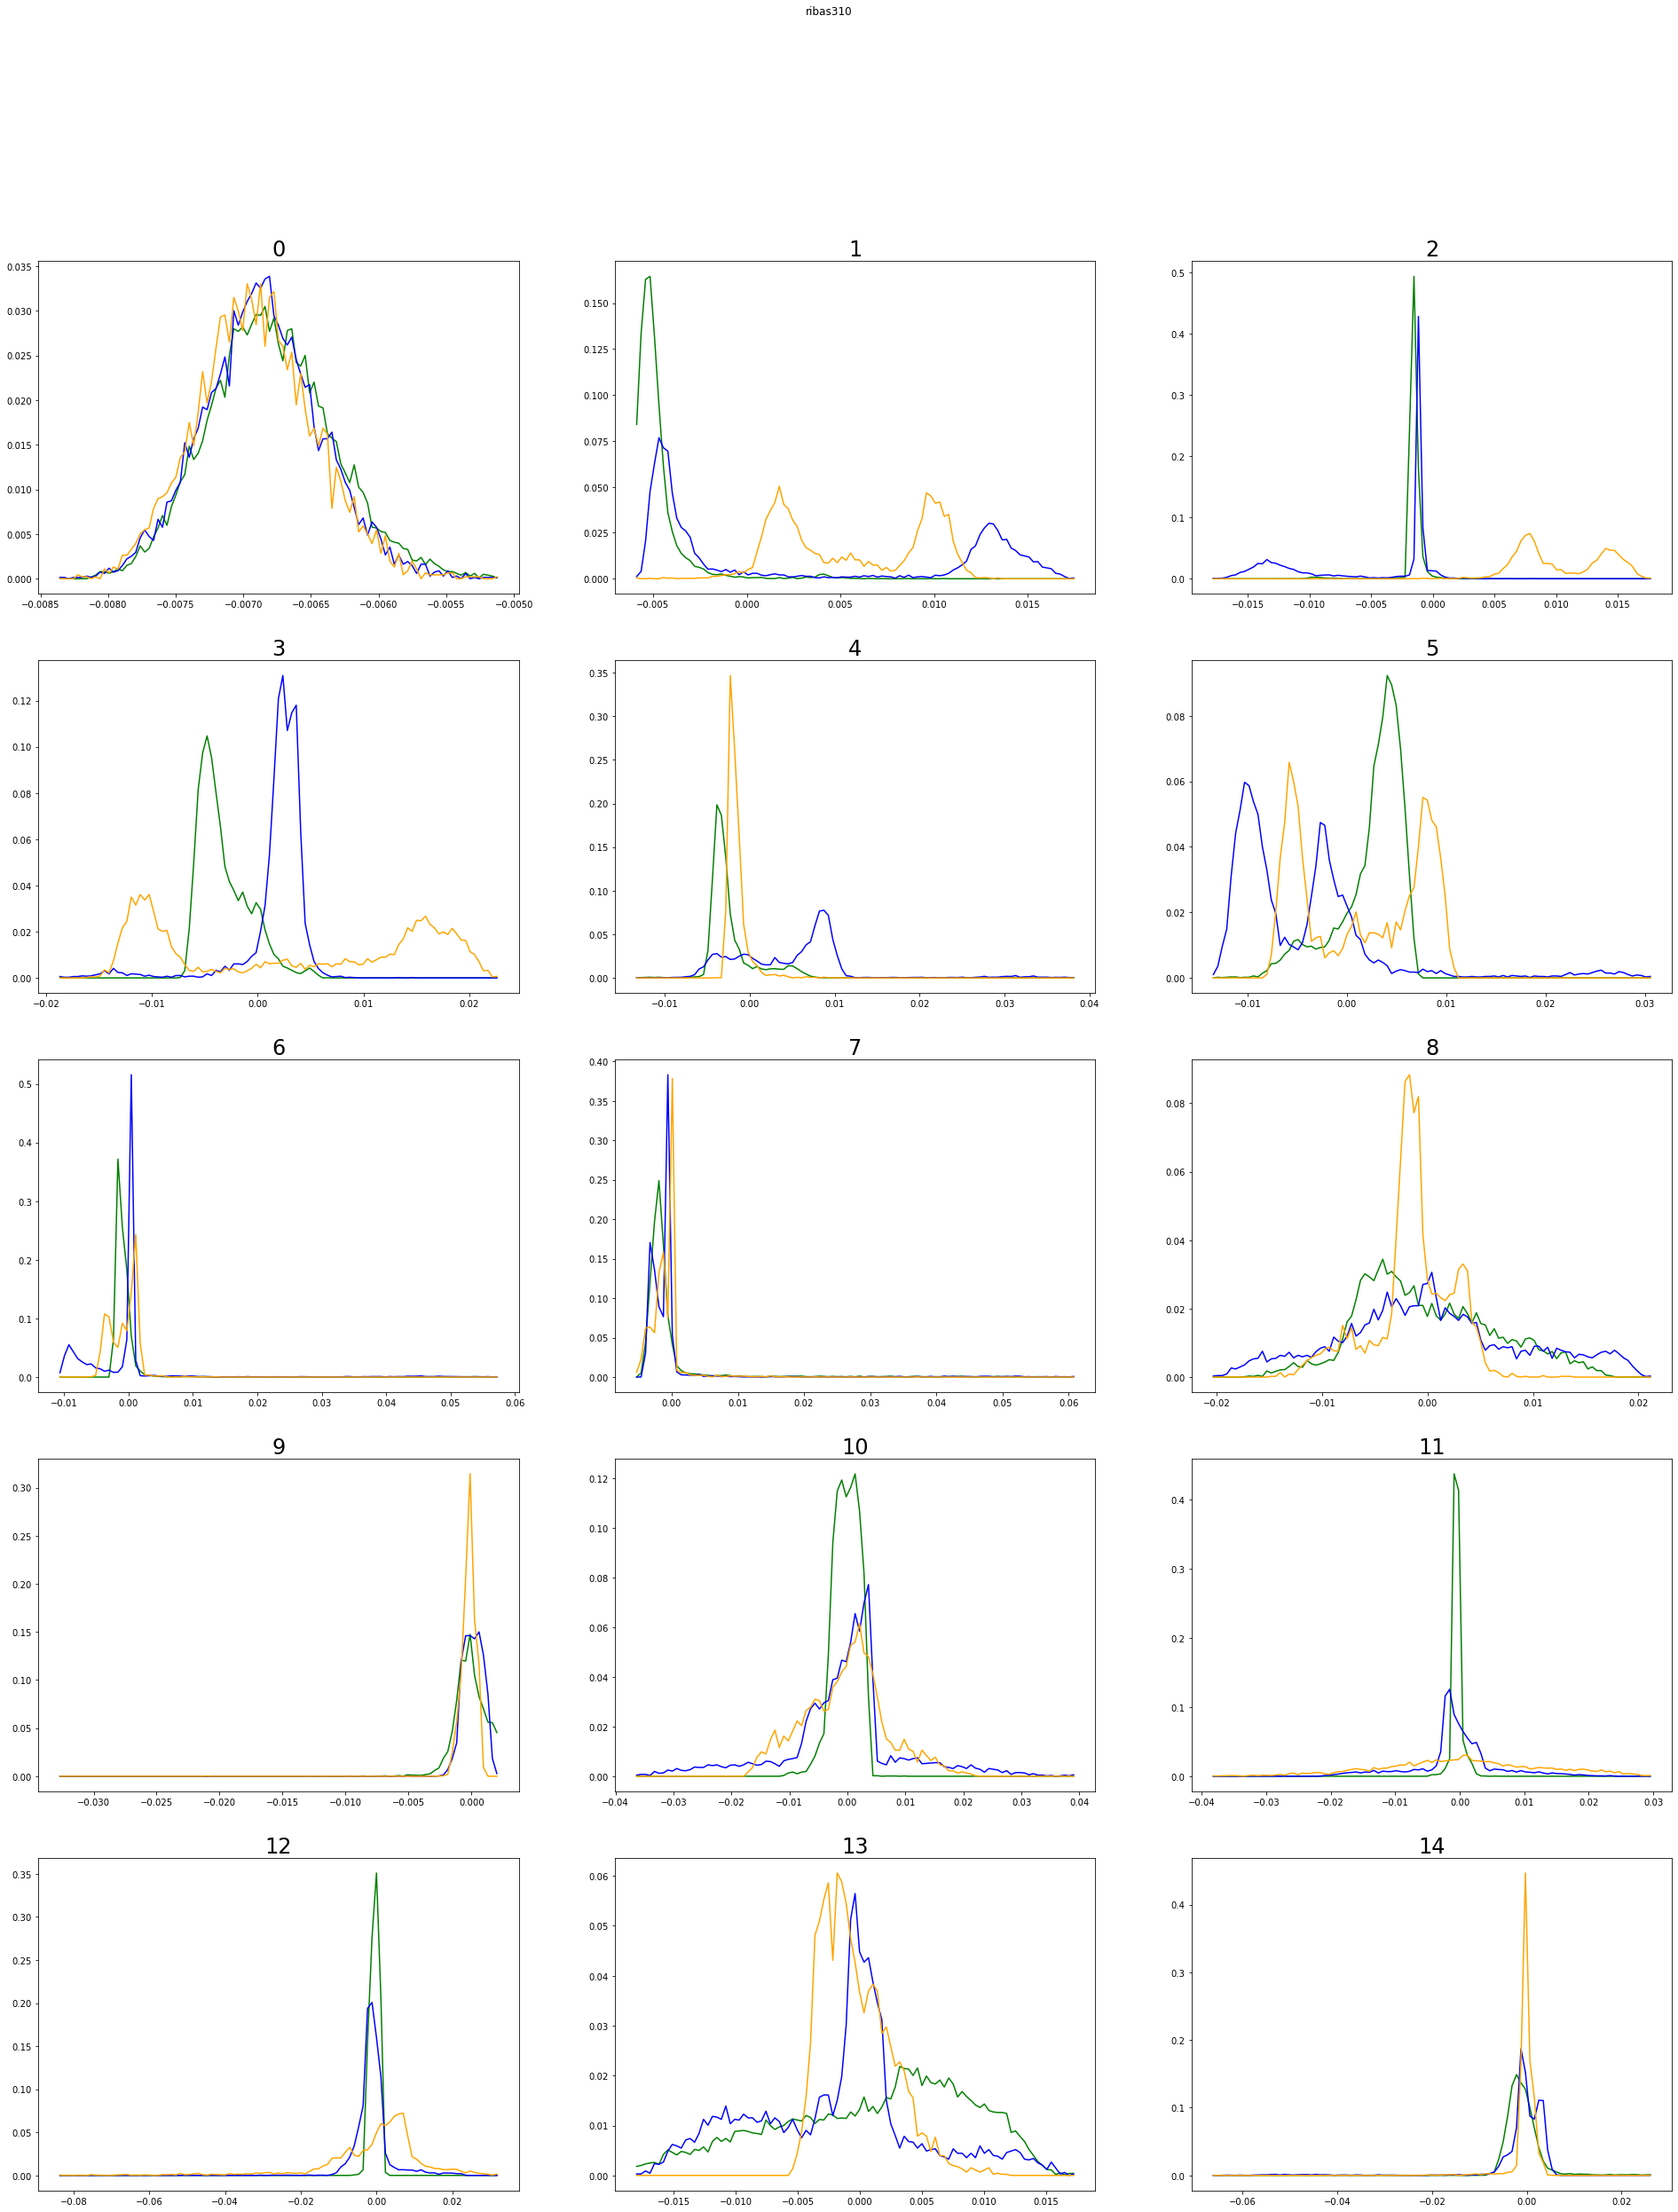

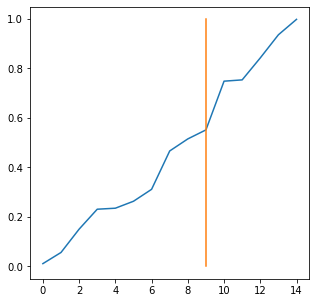

In [14]:
make_rnk(r310, "ribas310", ["pre","on","on_later"],"ribas_final")

In [15]:
on=pd.read_csv("ribas_final/inferCNV_ribas_310_on_GEX_5pv2",index_col=0)
on=np.transpose(on)

on_later=pd.read_csv("ribas_final/inferCNV_ribas_310_on_later",index_col=0)
on_later=np.transpose(on_later)

pre=pd.read_csv("ribas_final/inferCNV_ribas_310_pre",index_col=0)
pre=np.transpose(pre)

treatment=[]
for i in r310.obs["orig.ident"]:
    if "_pre_" in i:
        treatment.append("pre")
    elif "on" in i:
        if "later" not in i:
            treatment.append("on")
        else:
            treatment.append("on_later")

r310.obs["treatment"]=treatment

on_barcodes=[r310.obs_names[i] for i in range(len(r310.obs["treatment"])) if r310.obs["treatment"][i]=="on"]
pre_barcodes=[r310.obs_names[i] for i in range(len(r310.obs["treatment"])) if r310.obs["treatment"][i]=="pre"]
later_barcodes=[r310.obs_names[i] for i in range(len(r310.obs["treatment"])) if r310.obs["treatment"][i]=="on_later"]

infer_on_barcodes=on.index
tumor_on=pd.DataFrame()
modifier="-"+on_barcodes[0].split("-")[2]
for i in infer_on_barcodes:
    if i+modifier in on_barcodes:
        tumor_on[i+modifier]=on.loc[i]

infer_pre_barcodes=pre.index
tumor_pre=pd.DataFrame()
modifier="-"+pre_barcodes[0].split("-")[2]
for i in infer_pre_barcodes:
    if i+modifier in pre_barcodes:
        tumor_pre[i+modifier]=pre.loc[i]

infer_later_barcodes=on_later.index
tumor_later=pd.DataFrame()
modifier="-"+later_barcodes[0].split("-")[2]
for i in infer_later_barcodes:
    if i+modifier in later_barcodes:
        tumor_later[i+modifier]=on_later.loc[i]

infer_full=pd.concat([tumor_on,tumor_later,tumor_pre],axis=1)

shared_genes=np.intersect1d(tumor_on.index,tumor_pre.index)
shared_genes=np.intersect1d(shared_genes, tumor_later.index)

drop=[]
for i in infer_full.index:
    if i not in shared_genes:
        drop.append(i)
infer_full=infer_full.drop(drop)

infer_full=np.transpose(infer_full)

In [48]:
infer_full

GGACAGAAGAAGGGTA-1-3  TCAATCTCACTTGGAT-1-3  TTGCCGTAGTTACGGG-1-3  \
NOC2L               1.001009              1.001009              1.001009   
SDF4                1.001009              1.001009              1.001009   
INTS11              1.001009              1.001009              1.001009   
CCNL2               1.001009              1.001009              1.001009   
MRPL20              1.001009              1.001009              1.001009   
...                      ...                   ...                   ...   
PLXNB2              1.001009              1.001009              1.001009   
PPP6R2              1.001009              1.001009              1.001009   
SBF1                1.001009              1.001009              1.001009   
LMF2                1.001009              1.001009              1.001009   
CHKB                1.001009              1.001009              1.001009   

        AACTCAGGTAATTGGA-1-3  CGAGCCAAGTTAACGA-1-3  ATGCGATCACACCGCA-1-3  \
NOC2L               1.001009              1.001009              1.001009   
SDF4                1.001009              1.001009              1.001009   
INTS11              1.001009              1.001009              1.001009   
CCNL2               1.001009              1.001009              1.001009   
MRPL20              1.001009              1.001009              1.001009   
...                      ...                   ...                   ...   
PLXNB2              1.001009              1.001009              1.001009   
PPP6R2              1.001009              1.001009              1.001009   
SBF1                1.001009              1.001009              1.001009   
LMF2                1.001009              1.001009              1.001009   
CHKB                1.001009              1.001009              1.001009   

        GTTACAGAGAAGAAGC-1-3  GGGAATGGTCGCCATG-1-3  CTCGAAACAAGAGGCT-1-3  \
NOC2L               1.001009              1.001009              1.001009   
SDF4                1.001009              1.001009              1.001009   
INTS11              1.001009              1.001009              1.001009   
CCNL2               1.001009              1.001009              1.001009   
MRPL20              1.001009              1.001009              1.001009   
...                      ...                   ...                   ...   
PLXNB2              1.001009              1.001009              1.001009   
PPP6R2              1.001009              1.001009              1.001009   
SBF1                1.001009              1.001009              1.001009   
LMF2                1.001009              1.001009              1.001009   
CHKB                1.001009              1.001009              1.001009   

        AAGGCAGCAACCGCCA-1-3  ...  TGCCCATTCTTGTTTG-1-5  GTTACAGGTTCCATGA-1-5  \
NOC2L               1.001009  ...              1.001472              1.001472   
SDF4                1.001009  ...              1.001472              1.001472   
INTS11              1.001009  ...              1.001472              1.001472   
CCNL2               1.001009  ...              1.001472              1.001472   
MRPL20              1.001009  ...              1.001472              1.001472   
...                      ...  ...                   ...                   ...   
PLXNB2              1.001009  ...              1.001472              1.001472   
PPP6R2              1.001009  ...              1.001472              1.001472   
SBF1                1.001009  ...              1.001472              1.001472   
LMF2                1.001009  ...              1.001472              1.001472   
CHKB                1.001009  ...              1.001472              1.001472   

        CCTCTGAGTTGTCGCG-1-5  ATTCTACTCTCCCTGA-1-5  GGCAATTGTGATAAAC-1-5  \
NOC2L               1.001472              1.001472              1.001472   
SDF4                1.001472              1.001472              1.001472   
INTS11              1.001472              1.001472              1.00

In [53]:
infer_full.to_csv("N_infer_full_10.16.21")

In [29]:
reordered310=r310[infer_full.index]

In [33]:
reordered310.write_h5ad("N_ribas310_clones.h5")

In [30]:
#run PhenoGraph
communities, graph, Q = sc.external.tl.phenograph(pd.DataFrame(infer_full), k = 20)


Finding 20 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 16.89376187324524 seconds
Jaccard graph constructed in 6.408015727996826 seconds
Wrote graph to binary file in 1.6632797718048096 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.730606
After 4 runs, maximum modularity is Q = 0.73185
Louvain completed 24 runs in 8.451664686203003 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 38.47162175178528 seconds


In [31]:
reordered310.obs["inferCNV_clones"]=pd.Categorical(communities)

Trying to set attribute `.obs` of view, copying.


In [30]:
reordered310.shape

(21073, 21558)

... storing 'treatment' as categorical


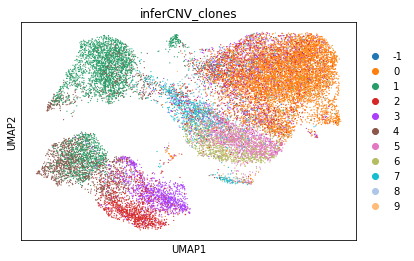

In [32]:
sc.pl.umap(reordered310,color=['inferCNV_clones'])

In [52]:
for i in range(len(infer_full.index)):
    if infer_full.index[i]!=reordered310.obs.index[i]:
        print("ERROR: barcode mismatch. Check ordering of treatment groups")

In [92]:
on_=[r310.obs["Diffusion component 1"][i] for i in range(len(r310.obs.index)) if r310.obs["treatment"][i]=="on"]
pre_=[r310.obs["Diffusion component 1"][i] for i in range(len(r310.obs.index)) if r310.obs["treatment"][i]=="pre"]
later_=[r310.obs["Diffusion component 1"][i] for i in range(len(r310.obs.index)) if r310.obs["treatment"][i]=="on_later"]

In [93]:
on_centroid=np.mean(on_)
pre_centroid=np.mean(pre_)
later_centroid=np.mean(later_)

In [94]:
treatment_traj=[pre_centroid,on_centroid,later_centroid]

In [133]:
y=treatment_traj

In [96]:
'''regress each infercnv gene data (1 x #centroids) on treatment centroids'''
reg_scores=[]
coeff=[]
intercept=[]
Xs=[]
for i in range(len(shared_genes)):    
    X=np.transpose([[np.mean(tumor_pre.loc[shared_genes[i]]),np.mean(tumor_on.loc[shared_genes[i]]),np.mean(tumor_later.loc[shared_genes[i]])]])
    Xs.append(X)
    y=treatment_traj
    reg = LinearRegression().fit(X, y)
    reg_scores.append(reg.score(X,y))
    coeff.append(reg.coef_)
    intercept.append(reg.intercept_)

In [97]:
np.argmax(reg_scores)

1437

In [69]:
tumor_pre.loc[shared_genes[i]]

TCACGAATCACGAAGG-1-0    1.001472
AACTCTTTCGTATCAG-1-0    1.001472
CTCGAAATCAACGCTA-1-0    1.001472
GTGCATATCCGAAGAG-1-0    1.001472
AGGGAGTAGGATATAC-1-0    1.001472
                          ...   
GGCAATTGTGATAAAC-1-0    0.892133
GTTCTCGAGTTTCCTT-1-0    1.001472
GTGCATATCAAAGACA-1-0    1.001472
ACAGCCGTCCGCGTTT-1-0    0.915403
CCTATTAAGTGACATA-1-0    1.001472
Name: ABCD3, Length: 9975, dtype: float64

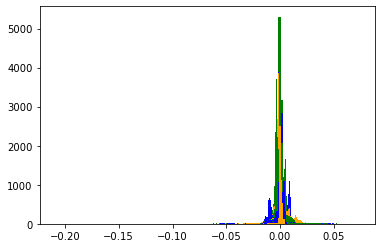

In [98]:
#Cam's code to make kde plots
t7_df=r310.to_df()
df=pd.DataFrame(r310.obsm["X_diffmap"])
n=df.shape[1]; max_cols=3
nrows=int(np.ceil(n/max_cols)); ncols=int(min((max_cols,n)))

pre=pd.DataFrame([df.iloc[i] for i in range(t7_df.shape[0]) if r310.obs["treatment"][i]=="pre"])
on=pd.DataFrame([df.iloc[i] for i in range(t7_df.shape[0]) if r310.obs["treatment"][i]=="on"])
post=pd.DataFrame([df.iloc[i] for i in range(t7_df.shape[0]) if r310.obs["treatment"][i]=="on_later"])

pre_hist_df=pd.DataFrame()
on_hist_df=pd.DataFrame()
post_hist_df=pd.DataFrame()

bins_df=pd.DataFrame()
for i in range(df.shape[1]):
    bins=np.linspace(min(min(pre[i]),min(on[i]),min(post[i])),max(max(pre[i]),max(on[i]),max(post[i])),100)
    bins_df[i]=bins
    pre_counts, _,pre_plot=plt.hist(pre[i],bins=bins,color="green");
    on_counts, _,on_plot=plt.hist(on[i],bins=bins,color="blue");
    post_counts, _,post_plot=plt.hist(post[i],bins=bins,color="orange");
    pre_hist_df[i]=pre_counts
    on_hist_df[i]=on_counts
    post_hist_df[i]=post_counts
pre_ms=pre_hist_df.sum(axis=0)
on_ms=on_hist_df.sum(axis=0)
post_ms=post_hist_df.sum(axis=0) 

pre_hist_norm=pd.DataFrame(pre_hist_df.div(pre_ms,axis=1))
on_hist_norm=pd.DataFrame(on_hist_df.div(on_ms,axis=1))
post_hist_norm=pd.DataFrame(post_hist_df.div(post_ms,axis=1))

In [99]:
dc_stdev=[np.std(pre_),np.std(on_),np.std(later_)]

In [136]:
list(shared_genes).index("CD58")

844

In [138]:
Xs[844]

array([[1.0005512662],
       [1.0056121352],
       [1.0006500897]])

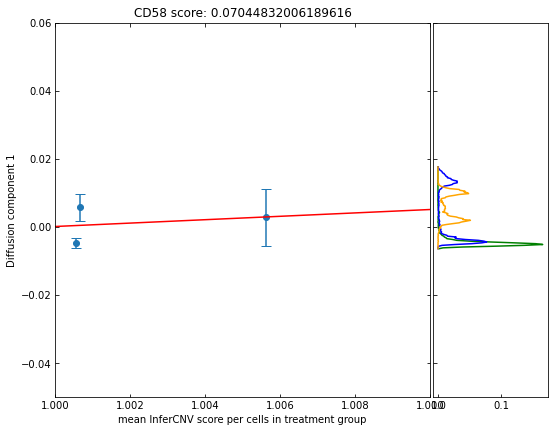

In [139]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

index=844

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

v=np.linspace(.97,1.21)
fit=coeff[index]*v+intercept[index]


ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(Xs[index], y)
ax_scatter.errorbar(Xs[index],y,yerr=dc_stdev,capsize=5,fmt='none')
ax_scatter.plot(v,fit, color='red')

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([y]).max() / binwidth) * binwidth
ax_scatter.set_ylim((-.05, .06))
ax_scatter.set_xlim((1.0, 1.01))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histy.plot(pre_hist_norm[1],-1*bins_df[1][0:99],c="green")
ax_histy.plot(on_hist_norm[1],-1*bins_df[1][0:99],c="blue")
ax_histy.plot(post_hist_norm[1],-1*bins_df[1][0:99],c="orange")
ax_histy.set_ylim(ax_scatter.get_ylim())

ax_scatter.set_xlabel("mean InferCNV score per cells in treatment group")
ax_scatter.set_ylabel("Diffusion component 1")
ax_scatter.set_title(shared_genes[index]+" score: "+str(reg_scores[index]))

plt.show()

In [112]:
reg_ranks=pd.DataFrame({"gene":np.asarray(shared_genes)[np.flip(np.argsort(reg_scores))],"score":np.asarray(reg_scores)[np.flip(np.argsort(reg_scores))]})

In [114]:
reg_ranks.to_csv("N_r310_generanks.rnk",header=False,index=False,sep="\t")

In [34]:
infer_full_np=np.asarray(infer_full)

In [46]:
infer_full

NOC2L      SDF4    INTS11     CCNL2    MRPL20  \
GGACAGAAGAAGGGTA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009   
TCAATCTCACTTGGAT-1-3  1.001009  1.001009  1.001009  1.001009  1.001009   
TTGCCGTAGTTACGGG-1-3  1.001009  1.001009  1.001009  1.001009  1.001009   
AACTCAGGTAATTGGA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009   
CGAGCCAAGTTAACGA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009   
...                        ...       ...       ...       ...       ...   
GGCAATTGTGATAAAC-1-5  1.001472  1.001472  1.001472  1.001472  1.001472   
GTTCTCGAGTTTCCTT-1-5  1.152337  1.147714  1.144628  1.141370  1.138487   
GTGCATATCAAAGACA-1-5  1.163315  1.155507  1.141342  1.137278  1.130978   
ACAGCCGTCCGCGTTT-1-5  1.001472  1.001472  1.001472  1.001472  1.001472   
CCTATTAAGTGACATA-1-5  1.001472  1.001472  1.001472  1.001472  1.001472   

                         SSU72  SLC35E2B    CDK11A      NADK      GNB1  ...  \
GGACAGAAGAAGGGTA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009  ...   
TCAATCTCACTTGGAT-1-3  1.001009  1.001009  1.001009  1.001009  1.001009  ...   
TTGCCGTAGTTACGGG-1-3  1.001009  1.001009  1.001009  1.001009  1.001009  ...   
AACTCAGGTAATTGGA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009  ...   
CGAGCCAAGTTAACGA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009  ...   
...                        ...       ...       ...       ...       ...  ...   
GGCAATTGTGATAAAC-1-5  1.001472  1.001472  1.001472  1.001472  1.001472  ...   
GTTCTCGAGTTTCCTT-1-5  1.133845  1.132396  1.131183  1.128991  1.128063  ...   
GTGCATATCAAAGACA-1-5  1.118832  1.113311  1.108189  1.098612  1.094177  ...   
ACAGCCGTCCGCGTTT-1-5  1.001472  1.001472  1.001472  1.001472  1.001472  ...   
CCTATTAAGTGACATA-1-5  1.001472  1.001472  1.001472  1.001472  1.001472  ...   

                         ZBED4    CRELD2      PIM3     TRABD   SELENOO  \
GGACAGAAGAAGGGTA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009   
TCAATCTCACTTGGAT-1-3  1.001009  1.001009  1.001009  1.001009  1.001009   
TTGCCGTAGTTACGGG-1-3  1.001009  1.001009  1.001009  1.001009  1.001009   
AACTCAGGTAATTGGA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009   
CGAGCCAAGTTAACGA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009   
...                        ...       ...       ...       ...       ...   
GGCAATTGTGATAAAC-1-5  1.001472  1.001472  1.001472  1.001472  1.001472   
GTTCTCGAGTTTCCTT-1-5  1.001472  1.001472  1.001472  1.001472  1.001472   
GTGCATATCAAAGACA-1-5  1.001472  1.001472  1.001472  1.001472  1.001472   
ACAGCCGTCCGCGTTT-1-5  1.001472  1.001472  1.001472  1.001472  1.001472   
CCTATTAAGTGACATA-1-5  1.001472  1.001472  1.001472  1.001472  1.001472   

                        PLXNB2    PPP6R2      SBF1      LMF2      CHKB  
GGACAGAAGAAGGGTA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009  
TCAATCTCACTTGGAT-1-3  1.001009  1.001009  1.001009  1.001009  1.001009  
TTGCCGTAGTTACGGG-1-3  1.001009  1.001009  1.001009  1.001009  1.001009  
AACTCAGGTAATTGGA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009  
CGAGCCAAGTTAACGA-1-3  1.001009  1.001009  1.001009  1.001009  1.001009  
...                        ...       ...       ...       ...       ...  
GGCAATTGTGATAAAC-1-5  1.001472  1.001472  1.001472  1.001472  1.001472  
GTTCTCGAGTTTCCTT-1-5  1.001472  1.001472  1.001472  1.001472  1.001472  
GTGCATATCAAAGACA-1-5  1.001472  1.001472  1.001472  1.001472  1.001472  
ACAGCCGTCCGCGTTT-1-5  1.001472  1.001472  1.001472  1.001472  1.001472  
CCTATTAAGTGACATA-1-5  1.001472  1.001472  1.001472  1.001472  1.001472  

[21073 rows x 6079 columns]

In [55]:
keep_ind=[]
for i in range(infer_full.shape[1]):
    counts=0
    for j in range(infer_full.shape[0]):
        if infer_full_np[j][i]>1.05 or infer_full_np[j][i]<.95:
            counts+=1
    if counts>6000:
        keep_ind.append(i)


filtered_infer_full=np.transpose(infer_full).iloc[keep_ind]

filtered_h5=reordered310[:,keep_ind]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [59]:
filtered_h5

View of AnnData object with n_obs × n_vars = 21073 × 1963
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'patient', 'ScrubDoublet', 'ScrubDoublet_score', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype_bped_main', 'celltype_bped_fine', 'celltype_iced_main', 'celltype_iced_fine', 'celltype_hpca_main', 'celltype_hpca_fine', 'celltype_mid_main', 'celltype_mid_fine', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'original_total_counts', 'log10_original_total_counts', 'n_counts', 'treatment', 'Myeloid', 'NK', 'Macrophage', 'Monocyte', 'B Cells', 'HSCs', 'T cells', 'T_regs', 'prolif', 'endothelial', 'fibroblast', 'erythroid', 'Th17', 'Th22', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'Diffusion component 0', 'Diffusion component 1', 'Diffusion component 2', 'Diffusion comp

In [60]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.00001)
y=filtered_h5.obs["Diffusion component 1"]
X=np.transpose(filtered_infer_full)
clf.fit(X,y)

Lasso(alpha=1e-05)

In [61]:
clf.coef_[np.flip(np.argsort(clf.coef_))]

array([ 0.0012690722,  0.0004910182,  0.0004432917, ...,  0.          ,
       -0.          , -0.0002523826])

In [88]:
clf.intercept_

0.02342778368539828

In [77]:
np.argmax(clf.coef_)

593

In [76]:
clf.coef_.shape

(1559,)

Text(0.5, 1.0, 'HLA-B CNV Line of best fit')

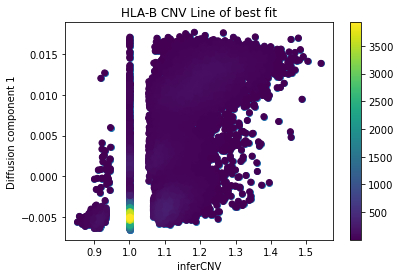

In [91]:
plt.scatter(X[X.columns[593]],y)

from scipy.stats import gaussian_kde

# Calculate the point density
x=X[X.columns[593]]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

v=np.linspace(min(x),1.5)
#fit=clf.coef_[np.argmax(clf.coef_)]*v

plt.scatter(x,y,c=z)
plt.colorbar()
#plt.plot(v,fit,color="red")
plt.xlabel("inferCNV")
plt.ylabel("Diffusion component 1")
plt.title(X.columns[593]+" CNV Line of best fit")

In [101]:
X.columns[np.flip(np.argsort(clf.coef_))][0:100]

Index(['HLA-B', 'KDM6B', 'HLA-C', 'RPL8', 'VOPP1', 'FNBP1', 'PHF1', 'ZC3H8',
       'ZCCHC7', 'TUBB', 'RPLP1', 'CTIF', 'RALGDS', 'DYM', 'CBWD2', 'RNGTT',
       'TSC1', 'DPP10', 'PAX8-AS1', 'RPL19', 'NCK2', 'TLN1', 'SURF4', 'TXNL1',
       'FBXL20', 'PILRB', 'CCDC93', 'ORC3', 'LYRM2', 'NUP153', 'MCC', 'YTHDC2',
       'APC', 'KCNN2', 'DTNBP1', 'MYLIP', 'GMPR', 'DCP2', 'REEP5', 'ATXN1',
       'KIF13A', 'CAP2', 'FAM8A1', 'SRP19', 'CCT8', 'EPB41L4A', 'ERAP2',
       'SLF1', 'MCTP1', 'TTC37', 'RHOBTB3', 'ELL2', 'CAST', 'ERAP1', 'LNPEP',
       'SLC25A46', 'CHD1', 'PPIP5K2', 'EFNA5', 'FBXL17', 'FER', 'PJA2',
       'MAN2A1', 'TPMT', 'MRS2', 'KDM1B', 'HCG17', 'ZSCAN26', 'TRIM27',
       'GABBR1', 'HLA-F', 'HLA-F-AS1', 'HLA-A', 'PPP1R11', 'TRIM26', 'HCG18',
       'ZNF322', 'HLA-E', 'GNL1', 'PRR3', 'ABCF1', 'PPP1R10', 'MRPS18B',
       'DHX16', 'PPP1R18', 'ZSCAN16-AS1', 'HCG11', 'DEK', 'ACOT13', 'RNF144B',
       'MBOAT1', 'E2F3', 'CDKAL1', 'SOX4', 'CASC15', 'FAM172A', 'TDP2',
       'C6orf6

In [94]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

ValueError: Unknown label type: 'continuous'

In [93]:
clf.coef_[np.flip(np.argsort(clf.coef_))]

array([ 0.0110594765,  0.0071444769,  0.0057820611, ..., -0.0057609903,
       -0.0057925534, -0.0058389144])

In [43]:
infer_full.shape

(21073, 6079)

### Diffusion Component Analysis

In [82]:
r310_tumor = subsample(r310, "celltype_bped_main", ['Melanocytes'])

In [10]:
sc.pp.neighbors(r310_tumor)
sc.tl.umap(r310_tumor)
sc.pl.umap(r310_tumor, color=["orig.ident"], ncols=1)

NameError: name 'r310_tumor' is not defined

In [81]:
sc.tl.diffmap(r310_tumor)
for i in range(r310_tumor.obsm["X_diffmap"].shape[1]):
    r310_tumor.obs["Diffusion component "+str(i)]=r310_tumor.obsm["X_diffmap"][:,i]

NameError: name 'r310_tumor' is not defined

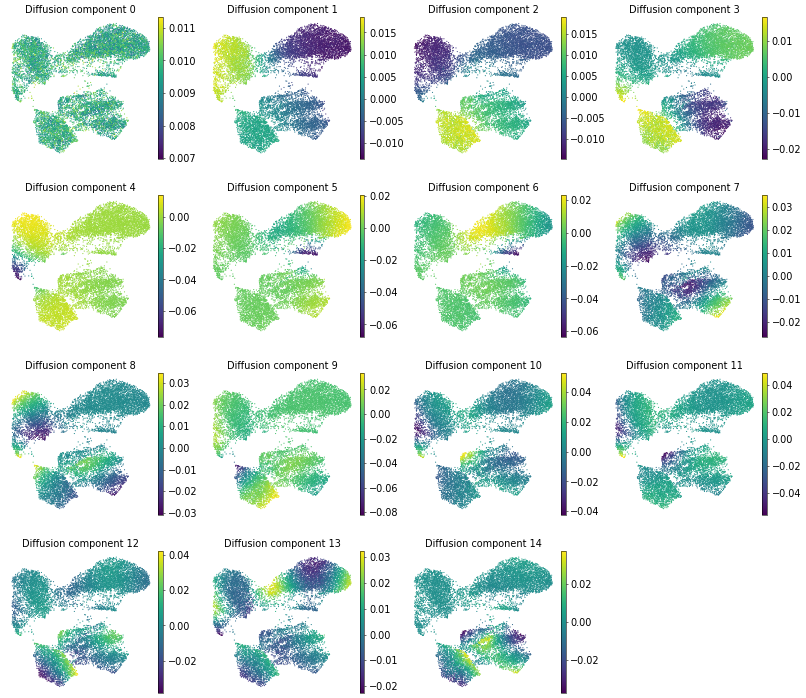

In [92]:
r310_tumor.obs["Diffusion component 2"]=-1*r310_tumor.obs["Diffusion component 2"]
sc.pl.umap(r310_tumor, color=["Diffusion component "+str(i) for i in range(r310_tumor.obsm["X_diffmap"].shape[1])])

[ 2  1  3 14  4  9  8 12  5  6 11 13 10  7  0]
[2 1 3]


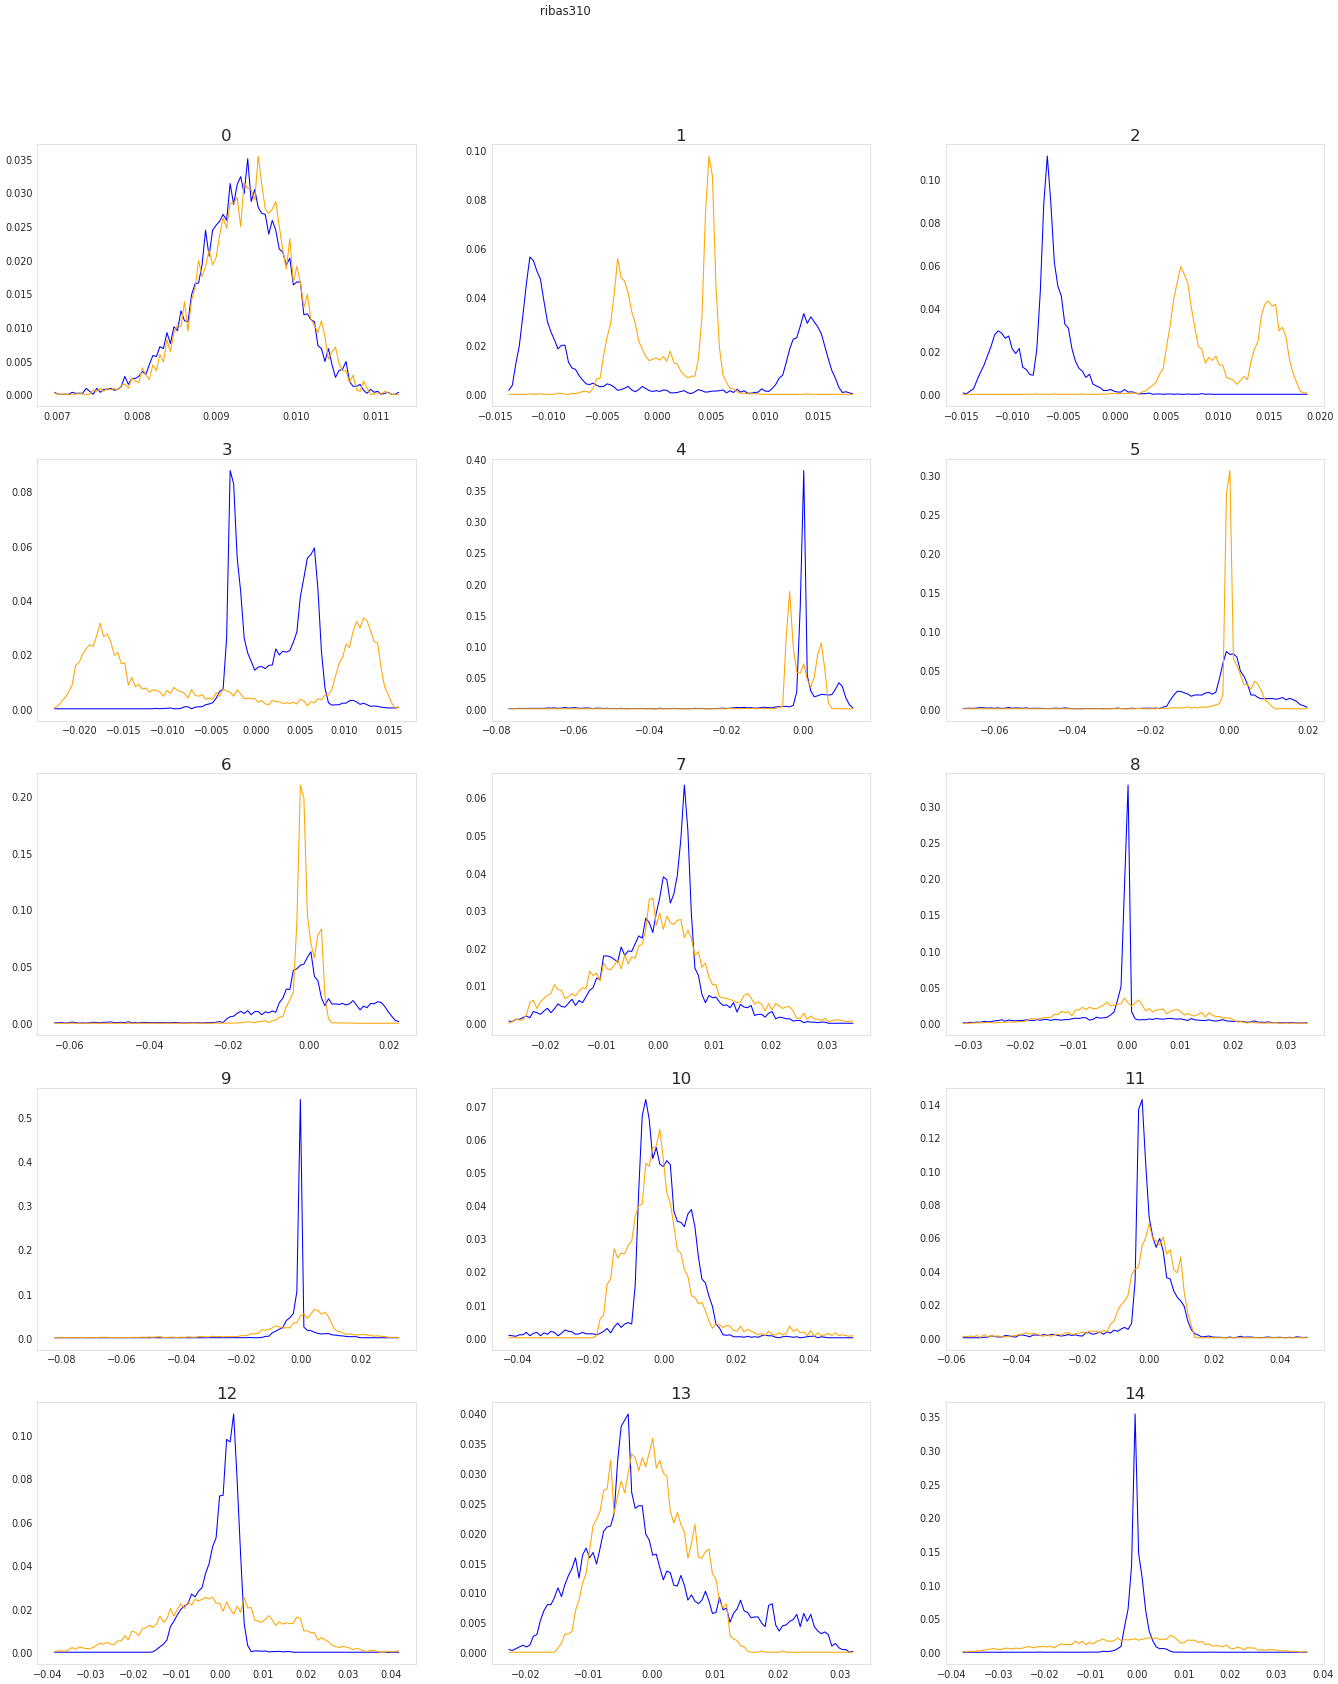

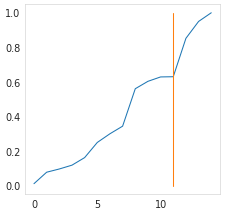

In [135]:
make_rnk(r310_tumor, "ribas310", ["on","on_later"],"ribas_final")

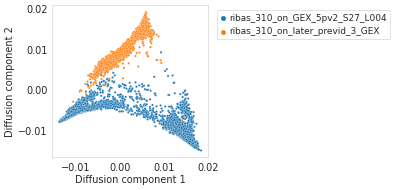

In [110]:
plot_best(r310_tumor,[1,2])

In [112]:
r319 = subsample(ribas_merged, "orig.ident", ['ribas_319_on_previd_2_GEX','ribas_319_pre_previd_1_GEX'])

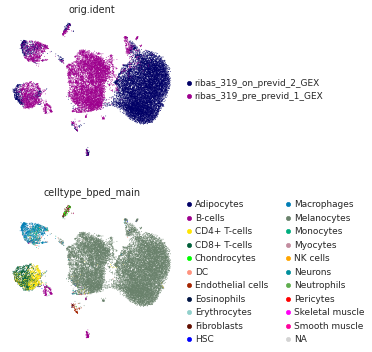

In [114]:
sc.pp.neighbors(r319)
sc.tl.umap(r319)
sc.pl.umap(r319, color=["orig.ident", 'celltype_bped_main'], ncols=1, palette=pmap2)

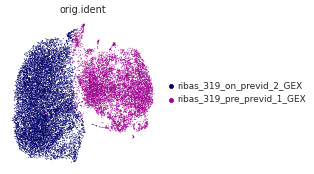

In [116]:
r319_tumor = subsample(r319, "celltype_bped_main", ['Melanocytes'])
sc.pp.neighbors(r319_tumor)
sc.tl.umap(r319_tumor)
sc.pl.umap(r319_tumor, color=["orig.ident"], ncols=1)

In [117]:
sc.tl.diffmap(r319_tumor)
for i in range(r319_tumor.obsm["X_diffmap"].shape[1]):
    r319_tumor.obs["Diffusion component "+str(i)]=r319_tumor.obsm["X_diffmap"][:,i]

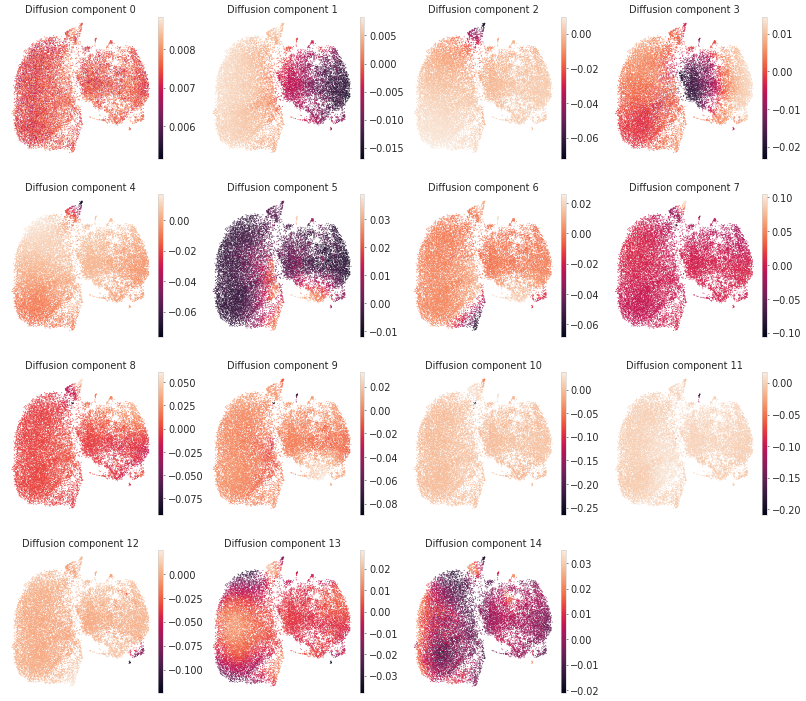

In [119]:
r319_tumor.obs["Diffusion component 1"]=-1*r319_tumor.obs["Diffusion component 1"]
sc.pl.umap(r319_tumor, color=["Diffusion component "+str(i) for i in range(r319_tumor.obsm["X_diffmap"].shape[1])])

[ 1  6  3  2  4  8 13 14  9 12 11  5  7 10  0]
[1]


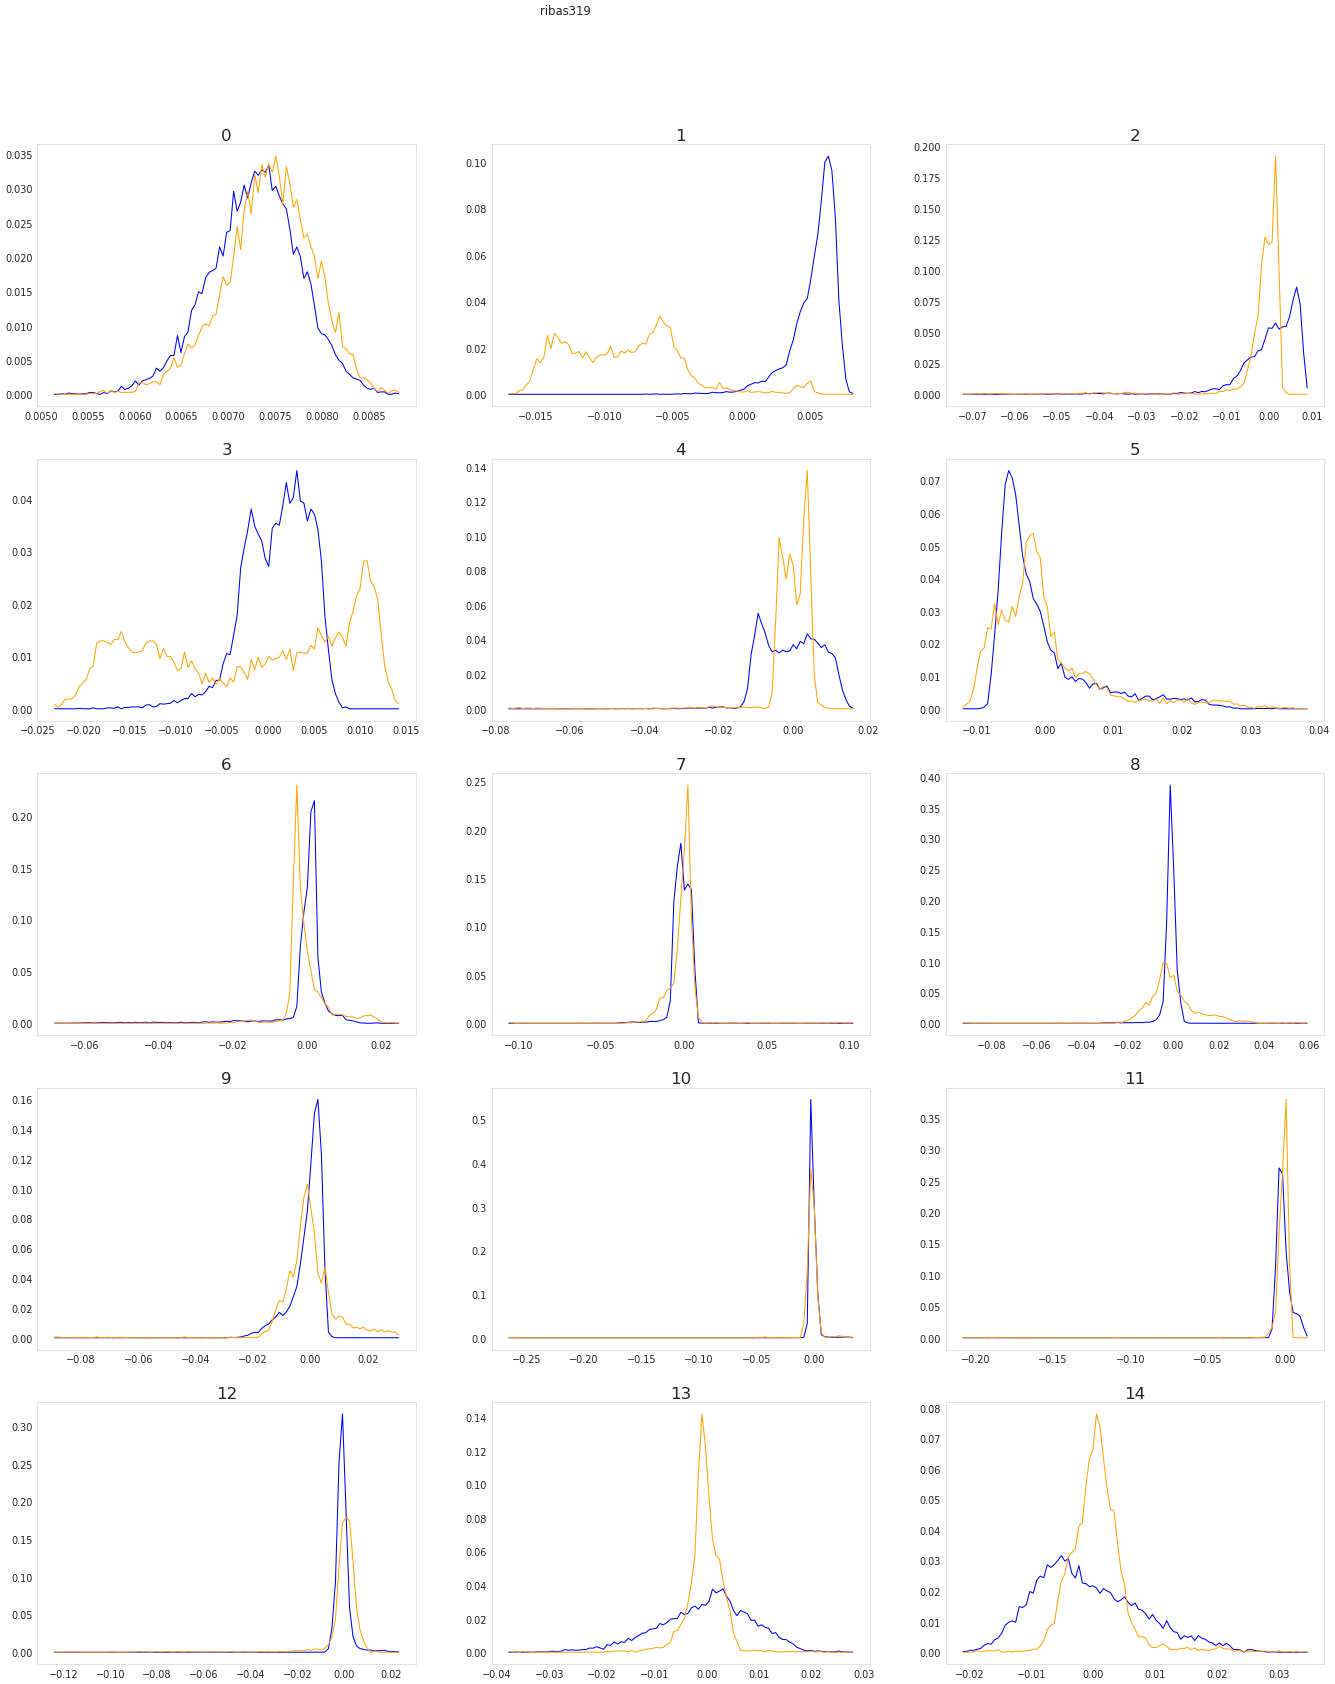

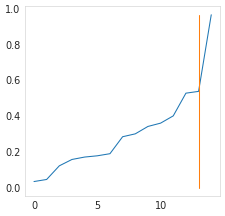

In [136]:
make_rnk(r319_tumor, "ribas319", ["on","pre"],"ribas_final")

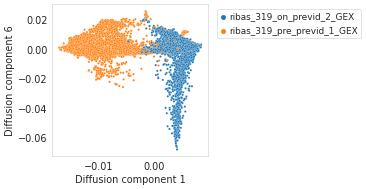

In [130]:
plot_best(r319_tumor,[1,6])

In [13]:
def subsample(adata, select, key):
    #select is the column in adata.obs that we will subsample by
    #key is the entries in obs that we will select
    index=[]
    for i in range(len(adata.obs[select])):
        if adata.obs[select][i] in key:
            index.append(i)
    return adata[index,:]

In [5]:
def plot_best(t7, indices):
    #plot the two DCs that give highest degree of separation of treatment
    randomize=np.arange(t7.obs["Diffusion component 1"].shape[0])
    np.random.shuffle(randomize)

    sns.set_style("whitegrid", {'axes.grid' : False})
    scatter=sns.scatterplot(x=t7.obs["Diffusion component "+str(indices[0])][randomize],y=t7.obs["Diffusion component "+str(indices[1])][randomize], hue=t7.obs["patient"][randomize],s=10)
    scatter.legend(bbox_to_anchor= (1.03, 1) );

    plt.show()

In [6]:
def find_knee(y_points):
    '''
    find the knee point of a graph (assumes evenly spaced points so I am ignoring change in x)
    '''
    diffs=[]
    for i in range(1,len(y_points)):
        diffs.append(y_points[i]-y_points[i-1])
    
    sort=np.flip(np.argsort(diffs))
    
    #we don' want knee point to be at start of the graph
    if sort[0]!=0:
        ind=sort[0]
    else:
        ind=sort[1]
        
    x=[i for i in range(len(y_points))]
    fig=plt.figure(figsize=[5,5])
    plt.plot(x,np.sort(y_points))
    plt.plot([ind for i in range(len(y_points))],np.transpose(np.linspace(0,max(y_points),len(y_points))))
    
    return y_points[ind]

In [7]:
#NEED TO RERUN THIS BECAUSE WASSERSTEIN DISTANCE WAS ONLY COMPUTED FOR ONE PAIR
def make_rnk(t7, sample_name, cats, directory, save=False):
    '''
    for hep7 to avoid the very weird small pre group'''
    
    #Cam's code to make kde plots
    t7_df=t7.to_df()
    df=pd.DataFrame()
    for i in range(t7.obsm["X_diffmap"].shape[1]):
        df=pd.concat([df,t7.obs["Diffusion component "+str(i)]],axis=1)
    df.columns=[i for i in range(15)]
    n=df.shape[1]; max_cols=3
    nrows=int(np.ceil(n/max_cols)); ncols=int(min((max_cols,n)))

    pre=pd.DataFrame([df.iloc[i] for i in range(t7_df.shape[0]) if t7.obs["treatment"][i]==cats[0]])
    on=pd.DataFrame([df.iloc[i] for i in range(t7_df.shape[0]) if t7.obs["treatment"][i]==cats[1]])
    post=pd.DataFrame([df.iloc[i] for i in range(t7_df.shape[0]) if t7.obs["treatment"][i]==cats[2]])

    pre_hist_df=pd.DataFrame()
    on_hist_df=pd.DataFrame()
    post_hist_df=pd.DataFrame()

    bins_df=pd.DataFrame()
    for i in range(df.shape[1]):
        bins=np.linspace(min(min(on[i]),min(post[i])),max(max(on[i]),max(post[i])),100)
        bins_df[i]=bins
        pre_counts, _,pre_plot=plt.hist(pre[i],bins=bins,color="green");
        on_counts, _,on_plot=plt.hist(on[i],bins=bins,color="blue");
        post_counts, _,post_plot=plt.hist(post[i],bins=bins,color="orange");
        pre_hist_df[i]=pre_counts
        on_hist_df[i]=on_counts
        post_hist_df[i]=post_counts
    pre_ms=pre_hist_df.sum(axis=0)
    on_ms=on_hist_df.sum(axis=0)
    post_ms=post_hist_df.sum(axis=0) 

    pre_hist_norm=pd.DataFrame(pre_hist_df.div(pre_ms,axis=1))
    on_hist_norm=pd.DataFrame(on_hist_df.div(on_ms,axis=1))
    post_hist_norm=pd.DataFrame(post_hist_df.div(post_ms,axis=1))

    plt.close()
    
    fig=plt.figure(figsize=[11*ncols,8*nrows])

    for i in range(df.shape[1]):
        ax=fig.add_subplot(nrows,ncols,i+1)
        plt.plot(bins_df[i][0:99],pre_hist_norm[i],c="green")
        plt.plot(bins_df[i][0:99],on_hist_norm[i],c="blue")
        plt.plot(bins_df[i][0:99],post_hist_norm[i],c="orange")
        ax.set_title(str(i),fontsize=24)
    plt.suptitle(sample_name)
    #end Cam's code
    
    #compute cosine distances between on and pre; on and post, add them 
    wassersteins=[]
    for i in range(on_hist_norm.shape[1]):
        wasserstein_on_post=scipy.spatial.distance.cosine(on_hist_norm[i],post_hist_norm[i])
        wassersteins.append(wasserstein_on_post)
    
    better_knee=find_knee(np.sort(wassersteins))
    
    #components=[]
    count=0
    for i in range(len(wassersteins)):
        if wassersteins[i]>better_knee:
            count+=1
            #components.append(i)
    print(np.flip(np.argsort(wassersteins)))  
    components=np.flip(np.argsort(wassersteins))[0:count]
    print(components)
    
    #master_rnk=pd.DataFrame(columns={"genes","pearson","component"})
    if save:
        for i in components:
            rnk(t7, i, sample_name, directory)
            #master_rnk=pd.concat([master_rnk,rnk(t7, i, sample_name)])

    return 

In [8]:
def plot_sigs(adata_full):
    temp=[str(i) for i in range(20)]
    sigs=pd.read_csv("gene_sigs.csv",names=temp,skiprows=[0])
    adata_df=adata_full.to_df()

    #create cell signature markers by averaging expression for each cell across all gene markers
    sigs_np=np.asarray(sigs)
    signatures=[]
    for i in range(sigs_np.shape[0]):
        temp=[]
        for j in range(sigs_np.shape[1]):
            if pd.isnull(sigs_np[i][j])==False:
                if sigs_np[i][j] in adata_df.columns:
                    temp.append(adata_df[sigs_np[i][j]])
        if len(temp)==0:
            signatures.append([0 for k in range(adata_df.shape[0])])
        else:
            signatures.append(np.mean(temp,axis=0))    

    signatures=np.asarray(signatures)

    signatures=pd.DataFrame(np.transpose(signatures), columns=sigs.index)

    signatures_types=sigs.index
    signatures=np.asarray(signatures)
    for i in range(signatures.shape[1]):
        adata_full.obs[signatures_types[i]]=signatures[:,i]

    sc.set_figure_params(dpi=50, frameon = None)
    sc.pl.umap(
        adata_full, 
        color=sigs.index,
        palette='tab20', color_map='Spectral_r', 
        edges = True, edges_width = 0.025,
        s=10
    )